In [1]:
## Wp2a Roast analysis - Plots for publication - Aloi Davide (PhD student - University of Birmingham)

import os
from nilearn import image, plotting
from nilearn.image import new_img_like
import matplotlib as mpl
import matplotlib.pyplot as plt

results_folder = 'D:\\roast-chapter3\\wp2a_results\\' # where wp2a e-field maps, current density maps and brain masks were saved

emag_scans = image.load_img(os.path.join(results_folder + 'wp2a_all_emag_maps.nii'))
cd_scans = image.load_img(os.path.join(results_folder + 'wp2a_all_cd_maps.nii'))
mask_scans = image.load_img(os.path.join(results_folder + 'wp2a_all_masks_maps.nii'))

C:\Users\davide\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
C:\Users\davide\anaconda3\lib\site-packages\nilearn\datasets\__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


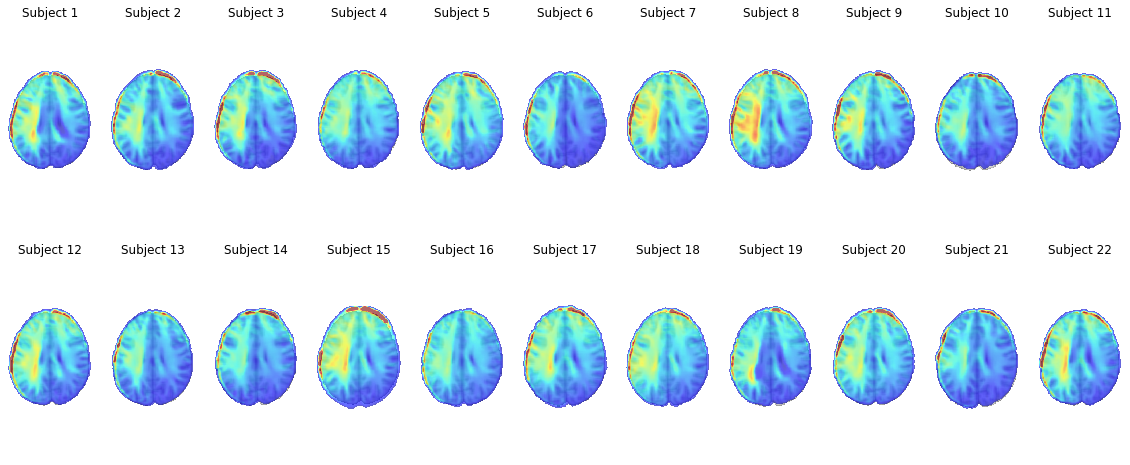

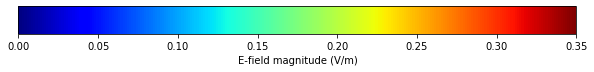

In [2]:
## Electric field magnitude maps (smoothed) plot

save_plt = True
fig, axes = plt.subplots(nrows = 2, ncols = 11, figsize = (20,8)) # Create mega plot with electric current maps
vmin, vmax = 0, 0.35 # Color map min and max. 

subject = 0
for ax in axes.flatten():
    display = plotting.plot_roi(new_img_like(emag_scans, emag_scans.get_fdata()[:,:,:,subject]),
              #bg_img = bck_img_map_smoothed,
              display_mode = 'z',
              annotate = False,
              dim = 0.5,
              cmap = 'jet',
              cut_coords = [28],
              threshold = 0.01,
              vmin = vmin,
              vmax = vmax,
              alpha = 0.60,
              draw_cross = False,
              black_bg = False,
              axes = ax)
    ax.title.set_text('Subject ' + str(subject + 1))
    subject += 1 # Move to next subject

if save_plt:
    plt.savefig('wp2a_e-mag_all.jpg', format='jpg', dpi=400)

# Colorbar for the above brain plots

fig, ax = plt.subplots(figsize=(10, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='E-field magnitude (V/m)')    
if save_plt:
    plt.savefig('wp2a_e-mag_all_cbar.jpg', format='jpg', dpi=400)

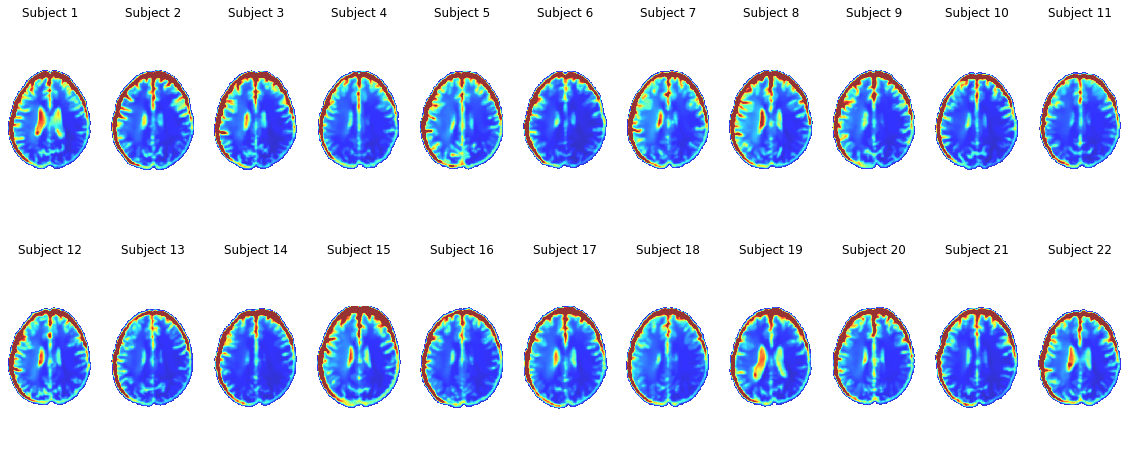

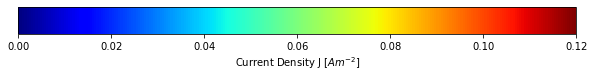

In [3]:
## Current density maps plot

save_plt = True
fig, axes = plt.subplots(nrows = 2, ncols = 11, figsize = (20,8)) # Create mega plot with current density maps

# Current density color map vmin and vmax
cd_vmin = 0
cd_vmax = 0.12
# Due to the smoothing you're going to have some small values of current density around the brain, which we won't show
cd_threshold = 0.005 

subject = 0
for ax in axes.flatten():
    display = plotting.plot_roi(new_img_like(emag_scans, cd_scans.get_fdata()[:,:,:,subject]),
              bg_img = None,
              display_mode = 'z',
              annotate = False,
              #dim = 0.5,
              cmap = 'jet',
              cut_coords = [28],
              threshold = cd_threshold,
              vmin = cd_vmin,
              vmax = cd_vmax,
              alpha = 0.80,
              draw_cross = False,
              black_bg = False,
              axes = ax)
    ax.title.set_text('Subject ' + str(subject + 1))
    subject += 1 # Move to next subject

if save_plt:
    plt.savefig('wp2a_cd_all.jpg', format='jpg', dpi=400)

# Colorbar for the above brain plots

fig, ax = plt.subplots(figsize=(10, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=cd_vmin, vmax=cd_vmax)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Current Density J [$Am^{-2}$]')    
if save_plt:
    plt.savefig('wp2a_cd_all_cbar.jpg', format='jpg', dpi=400)

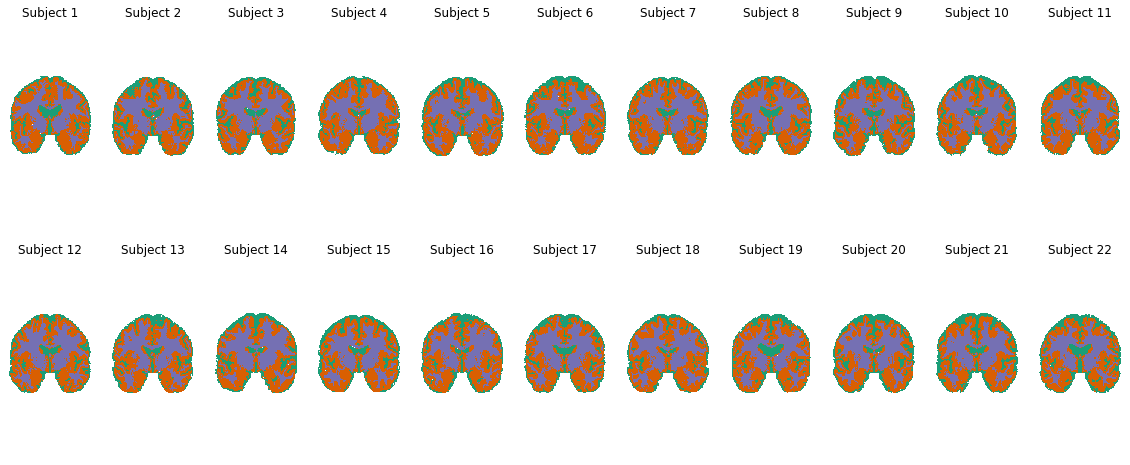

In [4]:
## Brain mask maps plot

save_plt = True
fig, axes = plt.subplots(nrows = 2, ncols = 11, figsize = (20,8)) # Create mega plot with all brain masks

subject = 0
for ax in axes.flatten():
    display = plotting.plot_stat_map(new_img_like(emag_scans, mask_scans.get_fdata()[:,:,:,subject]),
                                     bg_img = None,
                                     annotate = False,
                                     colorbar = False,
                                     cmap='Dark2_r',
                                     #colorbar = True,
                                     display_mode = 'y',
                                     cut_coords = [-5],                                     
                                     axes = ax) 
                                     
    ax.title.set_text('Subject ' + str(subject + 1))
    subject += 1 # Move to next subject

if save_plt:
    plt.savefig('wp2a_brainmasks_all.jpg', format='jpg', dpi=400)


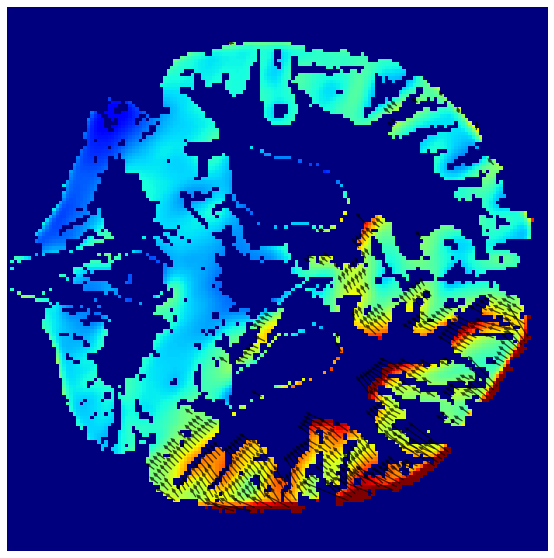

In [22]:
# Electric field vector map - Example for subject 1

from custom_functions.plotting_functions import roast_vector_sim
import glob, os
from nilearn import image, plotting
from nilearn.image import new_img_like
from matplotlib import pyplot as plt
main_folder = 'C:\\Users\\davide\\Documents\\GitHub\\wp1_2_roast\\' 
path = 'D:\\roast-chapter3\\wp2a_copy\\sub-01'

e_v = image.load_img(glob.glob(path + '/wsub-*_T1_*_e.nii')) # Electric field vectors
emag = image.load_img(glob.glob(path + '/wsub-*_T1_*_emag.nii')) # Electric field magnitude
scan_shape = emag.get_fdata().shape[0:3] # Shape of the scan
mni = image.load_img(os.path.join(main_folder, 'rois', 'MNI152_T1_1mm_Brain.nii')) #MNI brain to mask the data
mni_resampled= image.resample_to_img(mni, emag, interpolation = 'nearest')

emag_data = emag.get_fdata().reshape(scan_shape) # Data with 4th dimention in the array dropped
emag_map = new_img_like(emag, emag_data) #  Restoring the data into a nibabel object

mask_data = image.load_img(glob.glob(path + '/wsub-*T1*T2_masks.nii')).get_fdata()
mask = new_img_like(emag_map, mask_data.reshape(scan_shape)) # Data with 4th dimention in the array dropped

# Keeping only wm, gm and csf in the mask
mask_touched = image.math_img("(np.where(np.isin(img, np.arange(1, 4)), img, 0))*np.where(img2 !=0, 1,0)",
                              img = mask,
                              img2 = mni_resampled)

# Keeping only GM
mask_touched = image.math_img("np.where(img == 2, 1,0)",
                              img = mask_touched)

# Smoothing the two maps
emag_map = image.smooth_img(emag_map, fwhm = 4)
e_v = image.smooth_img(e_v, fwhm = 4)

# Plotting slice 68 of the coronal plane
fig = roast_vector_sim(e_v.get_fdata(), emag_map.get_fdata(), mask_touched.get_fdata(),
                 axis = 1,
                 vmin = 0, vmax = 0.16,
                 vmax_v = 0.5,
                 subsample = 5,
                 vmin_v = 0.08,
                 which_slice = 68,
                 scale = 4,
                 figsize=(10,10))
plt.show(fig)